## ICE-10. Image Transforms
Please download the input image from the following link:<br>
https://drive.google.com/file/d/11WCiKcdtXhbhaOnS4Y1VZfZgSQG9zWVo/view?usp=share_link <br><br>

###**Fast Fourier Transform Tutorial**


The 2-dimensional Fast Fourier Transform should be computed first.


Move the zero-frequency component to the middle of the spectrum in step two.


Reverse Step 2 by moving the zero-frequency component back to its original position in Step 3.


Fourth step: Reverse
The 2-dimensional inverse Fast Fourier Transform should be calculated in step 1. 

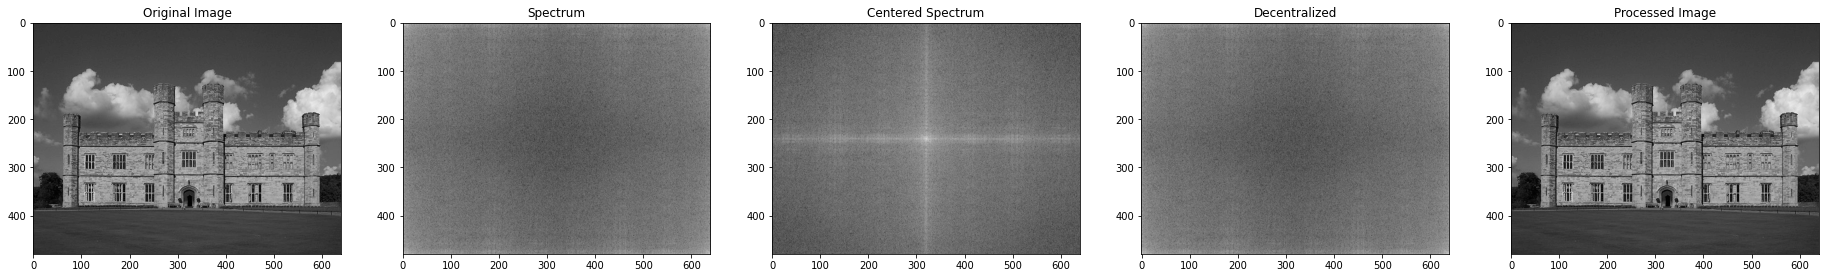

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as p
from math import sqrt,exp

p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
p.subplot(151), p.imshow(img, "gray"), p.title("Original Image")

original = np.fft.fft2(img)
p.subplot(152), p.imshow(np.log(1+np.abs(original)), "gray"), p.title("Spectrum")

center = np.fft.fftshift(original)
p.subplot(153), p.imshow(np.log(1+np.abs(center)), "gray"), p.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
p.subplot(154), p.imshow(np.log(1+np.abs(inv_center)), "gray"), p.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
p.subplot(155), p.imshow(np.abs(processed_img), "gray"), p.title("Processed Image")

p.show()

In [3]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

# Question 1 

### What is Fourier Transform ?

### What is Fast Fourier Transform ?

### What is difference between Fast Fourier Transform and Fourier Transform ?

### Which is better FT or FFT ? If so why ?

## Answer Here 

**Answer** : Using the Fourier Transform, a waveform can be reduced into a new representation that is comprised of sine and cosine functions with varying frequencies. The Fourier Transform shows that any waveform may be expressed as the sum of sinusoidals.

**Answer** : Through this technique, a signal's separate spectral components are broken down, and frequency information about the signal is also provided. FFTs are used for quality control, defect identification, and machine or system condition monitoring.

**Answer** : Functions that depend on frequency or amplitude are distinguished from those that depend on time or space using a Fourier Transform (FT). where as a certain DFT algorithm is known as FFT (FFT).

**Answer** : The Fast Fourier Transform (FFT) and the Fourier Transform (FT) vary primarily in that the FFT uses a discrete input while the FT uses a continuous input. Using DFT, a sequence (a discrete signal) is dissected into its constituent frequencies. This discrete time-domain signal can be transformed into a frequency-domain using the FFT method. As FFT uses discrete inputs it is more efficient than that of FT.

## Task 1

### By using above function please plot these filters with proper labels

- Ideal low Pass Filter
- Ideal High Pass Filter

(<matplotlib.axes._subplots.AxesSubplot at 0x7f07c1d77390>,
 Text(0.5, 1.0, 'Ideal High Pass Filter'))

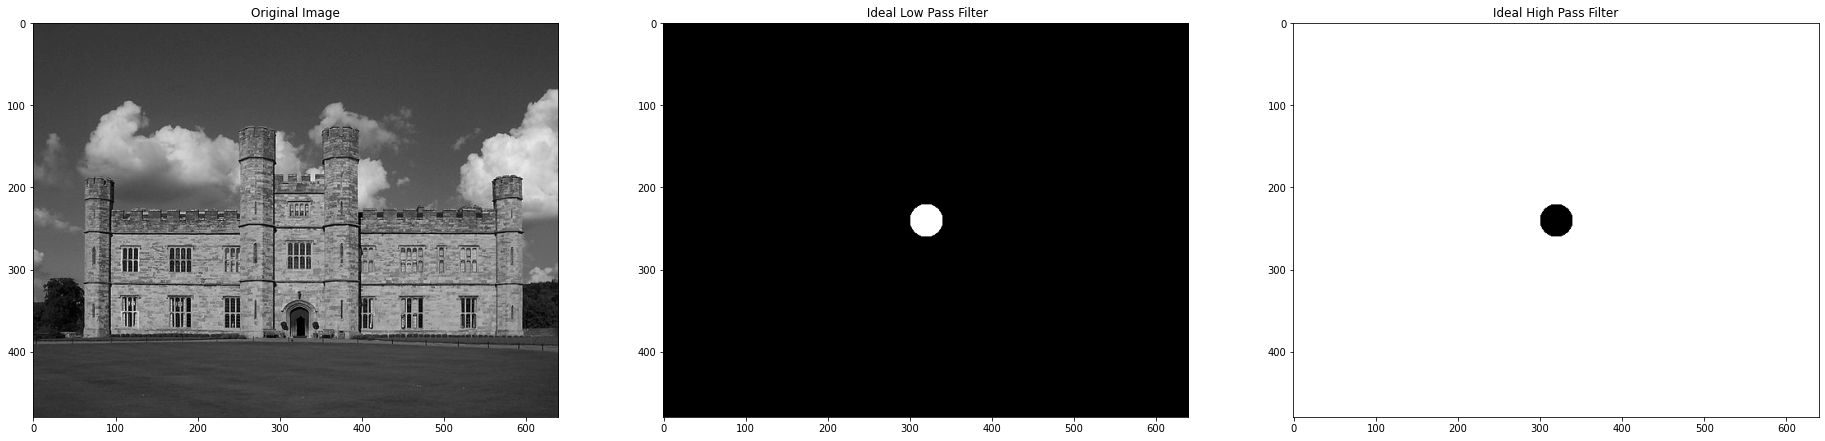

In [6]:
#code here 
from scipy import fftpack

img = cv2.imread("001.jpg", 0)
p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
p.subplot(131), p.imshow(img, "gray"), p.title("Original Image")
#convert image to numpy array
image1_np=np.array(img)
 
# Low Pass filter 
p.subplot(132), p.imshow(np.abs(idealFilterLP(20,img.shape)), "gray"), p.title(" Ideal Low Pass Filter")

# High pass Filter
p.subplot(133), p.imshow(np.abs(idealFilterHP(20,img.shape)), "gray"), p.title("Ideal High Pass Filter")

## Task 2

### Just like above function of ideal filter , Write functions for the following filters 

- Butterworth low Pass Filter
- Butterworth High Pass Filter
- Gaussian low pass Filter
- Gaussian High pass Filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7f07c1bd6790>,
 Text(0.5, 1.0, 'Butterworth HPF Output'))

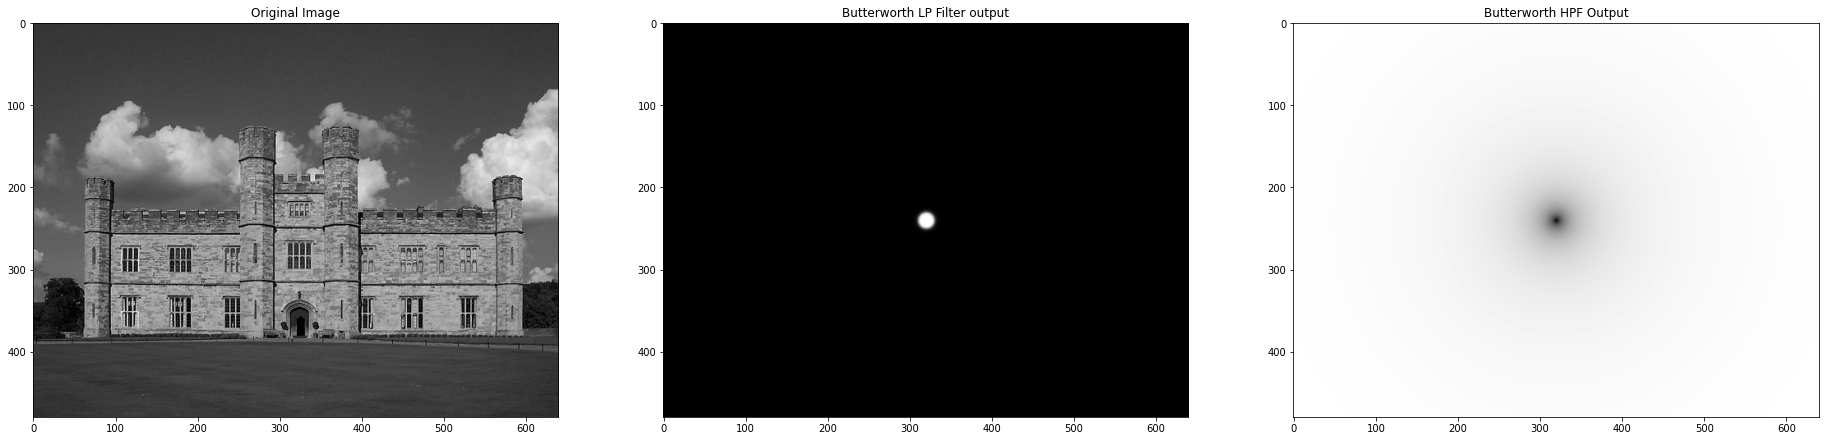

In [8]:
f = cv2.imread('001.jpg',0)

p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
p.subplot(131), p.imshow(f, "gray"), p.title("Original Image")

# Butterwort Low Pass Filter
def ButterWorthLP(D0,f,order):
  M,N = f.shape
  H = np.zeros((M,N), dtype=np.float32)
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      H[u,v] = 1 / (1 + (D/D0)**order)
  return H

L = ButterWorthLP(10,f,10)
p.subplot(132), p.imshow(L, "gray"), p.title("Butterworth LP Filter output")
def ButterWorthHP(D0,f,order):
  M,N = f.shape
  HPF = np.zeros((M,N), dtype=np.float32)
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      HPF[u,v] = 1 / (1 + (D0/D)**order)
  return HPF

H = ButterWorthHP(10,f,1)
p.subplot(133), p.imshow(H, "gray"), p.title("Butterworth HPF Output")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f07c1017210>,
 Text(0.5, 1.0, 'Gaussian HPF Output'))

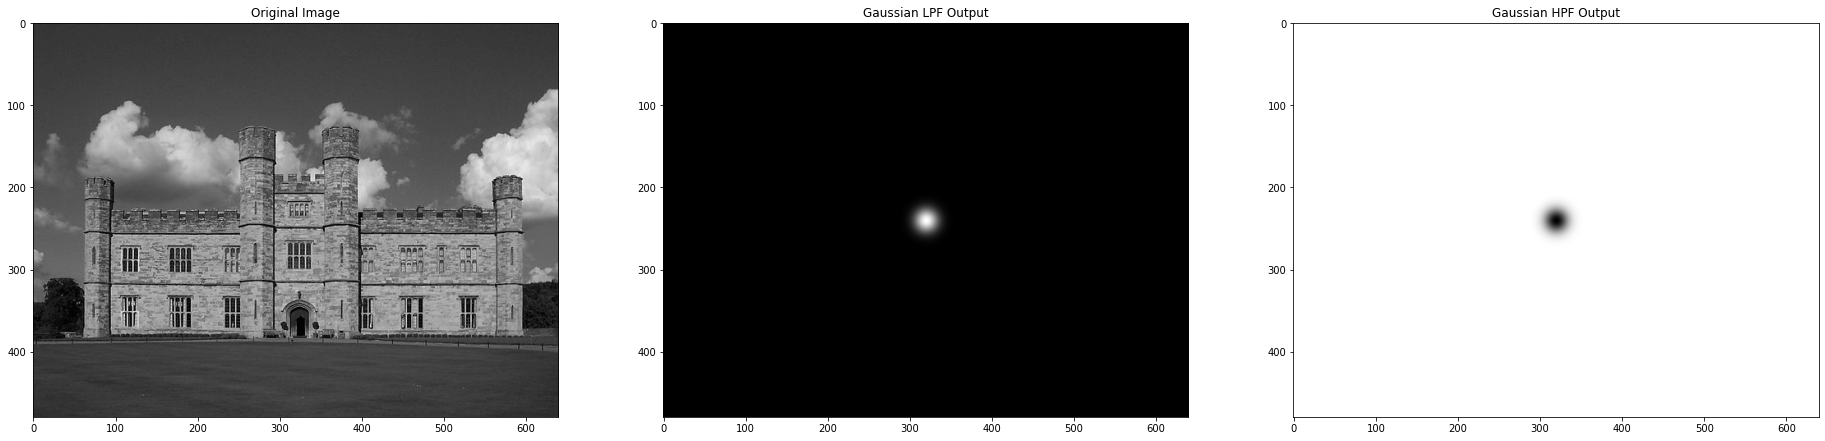

In [9]:
f = cv2.imread('001.jpg',0)

p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
p.subplot(131), p.imshow(f, "gray"), p.title("Original Image")

# Gaussian Low Pass Filter
def GaussianLP(D0,f):
  M,N = f.shape
  H = np.zeros((M,N), dtype=np.float32)
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      H[u,v] = np.exp(-D**2/(2*D0*D0))
  return H

L = GaussianLP(10,f)
p.subplot(132), p.imshow(L, "gray"), p.title("Gaussian LPF Output")
def GaussianHP(D0,f):
  HPF = 1 - GaussianLP(D0,f)
  return HPF

H = GaussianHP(10,f)
p.subplot(133), p.imshow(H, "gray"), p.title("Gaussian HPF Output")

## Task 3

### By using task 2 functions please plot these filters with proper labels

- Butterworth low Pass Filter for n = 5
- Butterworth High Pass Filter for n = 5
- Butterworth low Pass Filter for n = 20
- Butterworth High Pass Filter for n = 20 
- Gaussian Low Pass Filter
- Gaussian High Pass Filter


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7f07c2db5550>,
 Text(0.5, 1.0, 'Gaussian LP Filter output'))

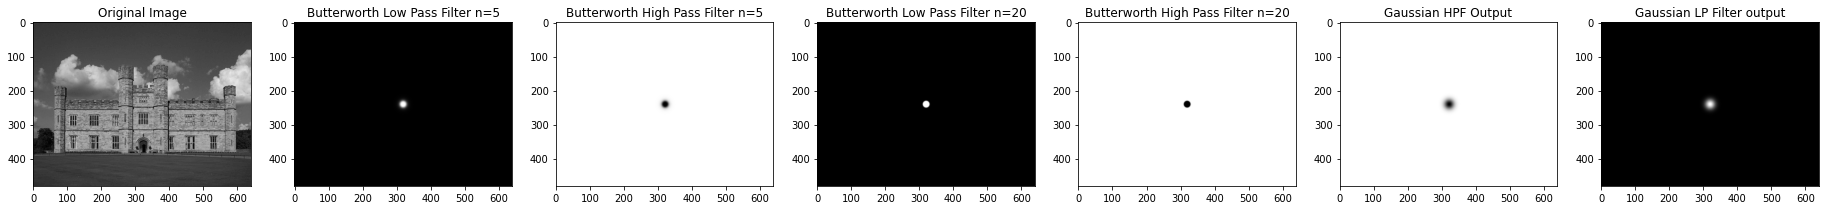

In [10]:
# code here
f = cv2.imread('001.jpg',0)

p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
p.subplot(171), p.imshow(f, "gray"), p.title("Original Image")

# Butterworth Low Pass Filter n=5
BL = ButterWorthLP(10,f,5)
p.subplot(172), p.imshow(BL, "gray"), p.title("Butterworth Low Pass Filter n=5")

# Butterworth High Pass Filter n=5
BH = ButterWorthHP(10,f,5)
p.subplot(173), p.imshow(BH, "gray"), p.title("Butterworth High Pass Filter n=5")

# Butterworth Low Pass Filter n=20
BL1 = ButterWorthLP(10,f,20)
p.subplot(174), p.imshow(BL1, "gray"), p.title("Butterworth Low Pass Filter n=20")

# Butterworth High Pass Filter n=20
BH1 = ButterWorthHP(10,f,20)
p.subplot(175), p.imshow(BH1, "gray"), p.title("Butterworth High Pass Filter n=20")

# Gaussian Low Pass Filter
GL = GaussianLP(10,f)

# Gaussian High Pass Filter
GH = GaussianHP(10,f)

p.subplot(176), p.imshow(GH, "gray"), p.title("Gaussian HPF Output")
p.subplot(177), p.imshow(GL, "gray"), p.title("Gaussian LP Filter output")

# Question 2

### What is Low pass Filter ? 
### Applications of low pass filter ? 
### What is high pass Filter ? 
### Applications of high pass filter ? 

## Answer Here

Answer 1. 
It helps in only passing the frequencies which are below the given frequencies. It helps in stopping all the frequencies which are more than the frequiencies specified .

Answer 2. 
The Low pass filters are used in noice cancellation devices , headphones , amplifiers.

Answer 3.
High pass filters are the filters which only allow the frequency ranges which are above a certain limit that is specified , any frequency which is below the frequency is truncated.

Answer 4.
Applications  of HPF are they are used in audio recorders whic allow only high frequencies to pass, in audio speakers and some noice cancelling devices which allow only high frequencies to be heard.

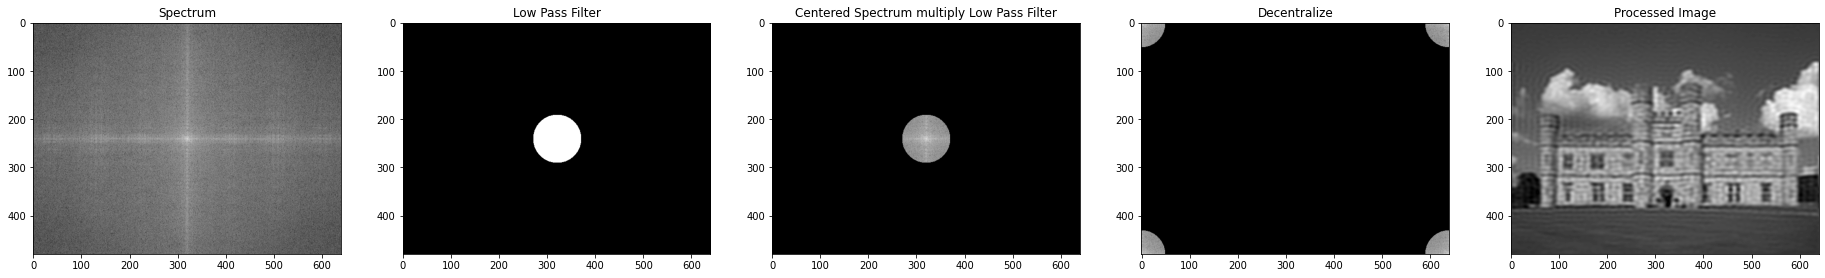

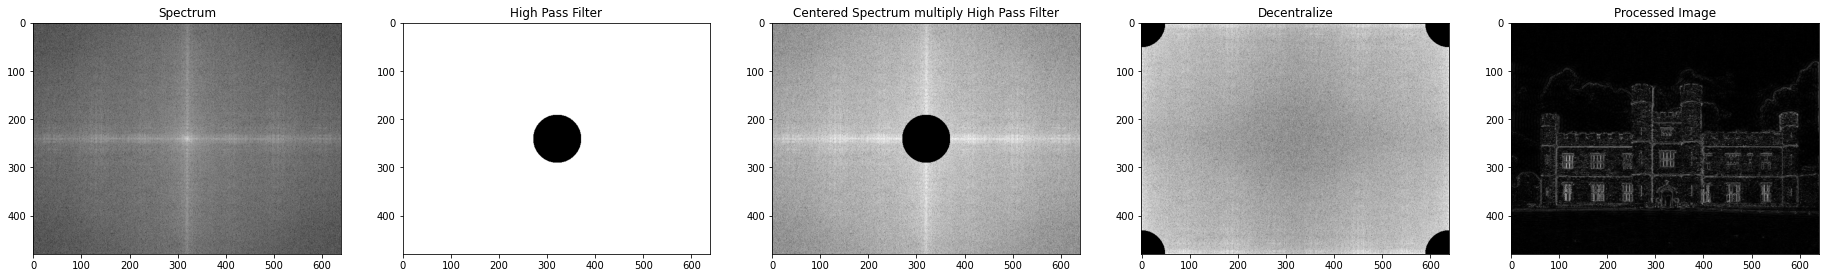

In [ ]:
# Tutorial 
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

p.subplot(151), p.imshow(np.log(1+np.abs(center)), "gray"), p.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
p.subplot(152), p.imshow(np.abs(LowPass), "gray"), p.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
p.subplot(153), p.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), p.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
p.subplot(154), p.imshow(np.log(1+np.abs(LowPass)), "gray"), p.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
p.subplot(155), p.imshow(np.abs(inverse_LowPass), "gray"), p.title("Processed Image")

p.show()
############
print("========================================================================================================================")
p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

p.subplot(151), p.imshow(np.log(1+np.abs(center)), "gray"), p.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
p.subplot(152), p.imshow(np.abs(HighPass), "gray"), p.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
p.subplot(153), p.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), p.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
p.subplot(154), p.imshow(np.log(1+np.abs(HighPass)), "gray"), p.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
p.subplot(155), p.imshow(np.abs(inverse_HighPass), "gray"), p.title("Processed Image")

p.show()



# **Question 3**


## In the task above what is the characteristics of low pass and high pass filter ?

- Explain how the behavoiur change from left image to right image in both the filters 
- conclude what each kind of filter does here 

## Answer here
Here thye fftshift moves all the frequencies that are zero to the middle of the series and next it makes the half-spaces swap all over the axis in the first image. In the second image it shows us the the frequescies which are less than 50 are trimmed. In the third image both the lowpass filter output and the centralised output are multiplied and is been plotted. in the fourth image the filter is decentralised i.e all the zero frequencies that are zero are moved away from the center. Image 5 inverse fourier transforms the image and gives us the 

## Task 4

### By using task 2 functions write code for High pass centered filters and plot these filters with proper labels

- Ideal High Pass
- Butterworth High Pass (n=15)
- Gaussian High Pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7f07c0af08d0>,
 Text(0.5, 1.0, 'Gaussian HPF centered Output'))

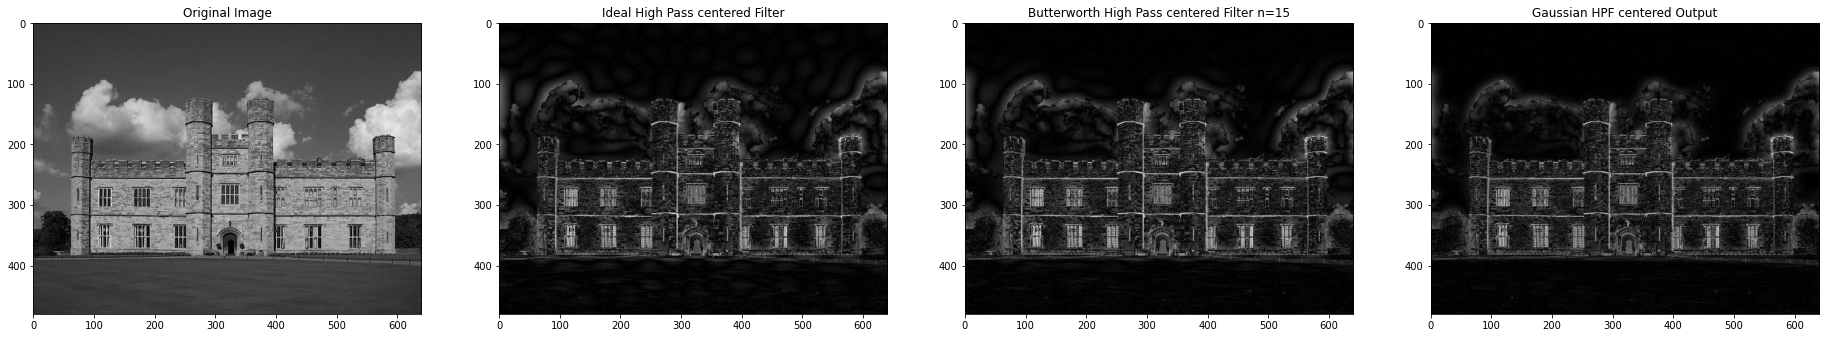

In [13]:
# code it here 
f = cv2.imread('001.jpg',0)

p.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
p.subplot(141), p.imshow(f, "gray"), p.title("Original Image")

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

# Ideal High Pass Filter
IH = idealFilterHP(10, f.shape)

Gshift = Fshift * IH
# G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(Gshift))
p.subplot(142), p.imshow(g, "gray"), p.title("Ideal High Pass centered Filter")

# Butterworth High Pass Filter n=15
BH = ButterWorthHP(10,f,15)

Gshift = Fshift * BH
g = np.abs(np.fft.ifft2(Gshift))
p.subplot(143), p.imshow(g, "gray"), p.title("Butterworth High Pass centered Filter n=15")

# Gaussian High Pass Filter
GH = GaussianHP(10,f)


# frequency domain image filters
Gshift = Fshift * GH
gh = np.abs(np.fft.ifft2(Gshift))

p.subplot(144), p.imshow(gh, "gray"), p.title("Gaussian HPF centered Output")


# Question 4 

### Which has more smooth image , Gaussian filter or Butterworth ? 
### Ideal filter , Butterworth filter and Gaussian filter. Distortion is high in which filter among these ? 

##Answer here 

Here we can see thayt Gaussian Filter is smoother than that of Butterworth filter.
In the above filter we can see that the ideal highpass filter is the most distorted we can find the clousd in the image which is giving various patterns which is not found in original image , but the rest od the filters are very less distorted.